## ■ 주제(가설)
## 가설 1. 동학개미운동의 주역은 MZ 세대일까?
### 최근 주식~ '동학개미운동' 이라고 한다. 그 동학개미운동에 MZ 세대가 미치는 영향이 어느정도인지 분석하고자 한다.
---

## ■ 데이터 수집 및 데이터 설명
### 1. 한국투자증권 데이터
### 동학개미운동(20.01.20~20.03.31) 기간 동안 당사 신규 고객으로 등록하고 국내주식을 매매한 고객 약 27만명 중, 거래내역 횟수가 총 30회 이상인 고객 약 2.5만명(10% 수준) 랜덤추출

### 2. KRX 데이터

## ■ 데이터 전처리

### ▩ 모듈 임포트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager, rc

pd.set_option('display.max_columns', None)
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.5f}'.format
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

### ▩ 데이터 로드

In [2]:
han = pd.read_excel('c:\\data\\fin\\2021금융데이터 경진대회_데이터셋_한국투자증권(원본).xlsx')
han.head()

,고객구분코드,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,상품번호,상품명,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부
0,A0001,20200128,1,30,경기,1,00000A091970,나노캠텍,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,N,N
1,A0001,20200130,1,30,경기,3,00000A045060,오공,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,N,N
2,A0001,20200313,1,30,경기,1,00000A253840,수젠텍,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,N,N
3,A00010,20200220,1,20,경남,3,00000A009190,대양금속보통주,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355,N,N
4,A000100,20200211,2,40,서울,1,00000A001740,SK네트웍스보통주,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,N,N


### ▩ 데이터 정보 확인

In [3]:
han.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845940 entries, 0 to 845939
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   고객구분코드     845940 non-null  object
 1   주문일자       845940 non-null  int64 
 2   고객성별구분코드   845940 non-null  int64 
 3   동일나이군구분코드  845940 non-null  int64 
 4   주소(시도)     845940 non-null  object
 5   주문시간대      845940 non-null  int64 
 6   상품번호       845940 non-null  object
 7   상품명        845940 non-null  object
 8   거래소구분코드    845940 non-null  int64 
 9   매도매수구분코드   845940 non-null  int64 
 10  주문구분코드     845940 non-null  int64 
 11  실주문단가      845940 non-null  int64 
 12  주문수량       845940 non-null  int64 
 13  총체결수량      845940 non-null  int64 
 14  총체결금액      845940 non-null  int64 
 15  전일종가       845940 non-null  int64 
 16  당일시가       845940 non-null  int64 
 17  일중고가       845940 non-null  int64 
 18  일중저가       845940 non-null  int64 
 19  당일종가       845940 non-null  int64 
 20  거래수량

In [4]:
han.describe()

,주문일자,고객성별구분코드,동일나이군구분코드,주문시간대,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금
count,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000
mean,20200293.58838,1.39805,32.56805,1.90209,2.53770,1.65771,1.25635,32827.89095,142.04399,138.07741,1093017.73309,31684.80669,32153.55928,33949.57668,30607.72038,32225.32488,15625385.89195,276909625170.33759
std,47.59143,0.48950,9.55029,0.85412,0.49858,0.47448,0.97964,59278.94424,528.48657,513.03926,3171094.45434,58132.40605,58496.78688,60646.37939,56393.74030,58418.37751,37128785.99145,536614921295.61780
min,20200120.00000,1.00000,20.00000,1.00000,2.00000,1.00000,1.00000,33.00000,1.00000,1.00000,59.00000,65.00000,44.00000,44.00000,35.00000,44.00000,26.00000,58195.00000
25%,20200302.00000,1.00000,30.00000,1.00000,2.00000,1.00000,1.00000,4245.00000,3.00000,2.00000,46800.00000,3960.00000,4060.00000,4450.00000,3800.00000,4095.00000,1180660.00000,12200858390.00000
50%,20200317.00000,1.00000,30.00000,2.00000,3.00000,2.00000,1.00000,11050.00000,10.00000,10.00000,183600.00000,10150.00000,10600.00000,11600.00000,9900.00000,10750.00000,5763552.00000,66142614205.00000
75%,20200326.00000,2.00000,40.00000,3.00000,3.00000,2.00000,1.00000,44650.00000,70.00000,67.00000,789000.00000,44050.00000,43850.00000,46500.00000,42400.00000,44000.00000,19626058.00000,232277000000.00000
max,20200331.00000,2.00000,50.00000,4.00000,3.00000,2.00000,5.00000,1753000.00000,10389.00000,9999.00000,52657500.00000,1410000.00000,1419000.00000,1426000.00000,1394000.00000,1410000.00000,842628691.00000,2844020000000.00000


In [5]:
han.isnull().sum()

고객구분코드       0
주문일자         0
고객성별구분코드     0
동일나이군구분코드    0
주소(시도)       0
주문시간대        0
상품번호         0
상품명          0
거래소구분코드      0
매도매수구분코드     0
주문구분코드       0
실주문단가        0
주문수량         0
총체결수량        0
총체결금액        0
전일종가         0
당일시가         0
일중고가         0
일중저가         0
당일종가         0
거래수량         0
거래대금         0
상한가여부        0
하한가여부        0
dtype: int64

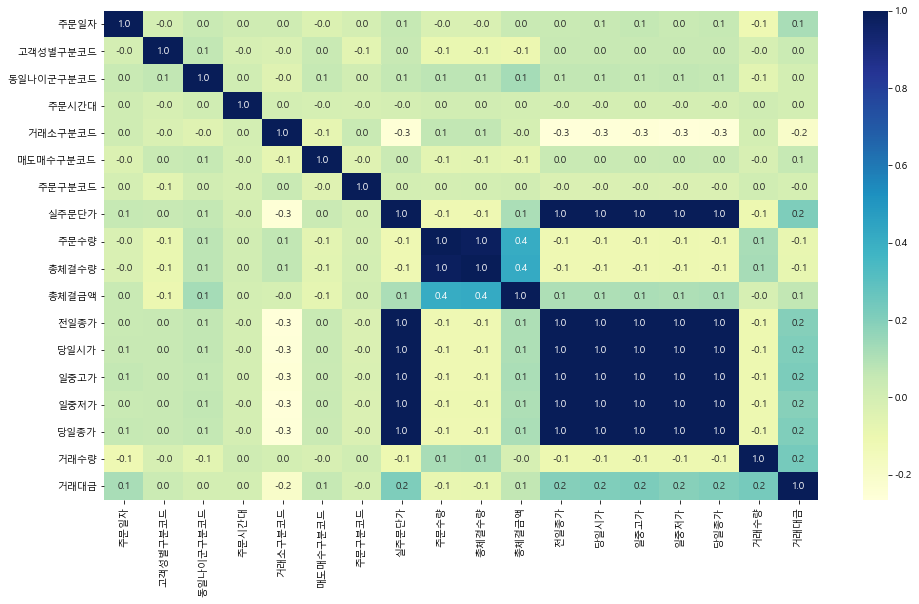

In [6]:
plt.figure(figsize=(16,9))
sns.heatmap(han.corr(), cmap='YlGnBu', annot=True, fmt='0.1f')
plt.show()

### ▩ 데이터 정보 확인 결과:
- 1. 데이터에 결측치는 없다.
- 2. 상관관계가 있는 컬럼들이 존재한다.

## ■ 기초 통계량 분석
### 나이군별 기초 통계량을 분석하여 각 나이군별 특징을 알아본다.

------------- 전체 거래 중 나이군별 비율 ---------------
30   0.39092
40   0.24847
20   0.23763
50   0.12298
Name: 동일나이군구분코드, dtype: float64
------------------------------------------------------


Text(0.5, 1.0, '나이군별 거래수')

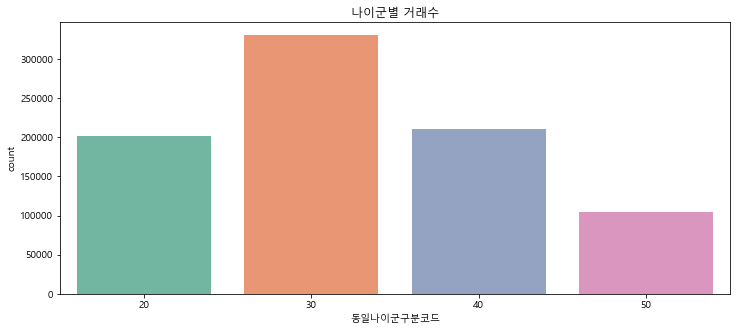

In [10]:
print('------------- 전체 거래 중 나이군별 비율 ---------------')
print(han['동일나이군구분코드'].value_counts() / han.shape[0])
print('------------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.countplot(han['동일나이군구분코드'], palette='Set2')
plt.title('나이군별 거래수')

In [16]:
grouped_sum = han.groupby('동일나이군구분코드').sum()
grouped_sum

,주문일자,고객성별구분코드,주문시간대,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금
동일나이군구분코드,,,,,,,,,,,,,,,,,
20,4060642033498,269053,382105,515532,325214,247487,5486249750,19979613,19531417,110896781229,5242832407,5343511798,5691140948,5075097247,5382851889,3866126325820,53510134065678224
30,6680176594743,467309,624834,843653,547193,423837,10681273617,43388094,42122128,336150710942,10253291765,10425714669,11048043974,9917404254,10475675410,5206734216162,93396442834166480
40,4245839638967,294604,400608,526415,354629,255375,7726204338,30680689,29851634,279829509695,7526615366,7616293398,7989890189,7259548425,7601916609,2852733541776,60060063105956968
50,2101578090943,151703,201507,261143,175284,136101,3876698362,26112296,25300021,197750419260,3780705834,3814462072,3990229785,3640245054,3800247418,1292544857681,27282288310802544


In [27]:
grouped_mean = han.groupby('동일나이군구분코드').mean()
grouped_mean

,주문일자,고객성별구분코드,주문시간대,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금
동일나이군구분코드,,,,,,,,,,,,,,,,,
20,20200289.69151,1.33845,1.90084,2.56459,1.61783,1.23116,27292.19502,99.39166,97.16204,551673.13154,26081.27792,26582.12307,28311.45786,25246.85352,26777.82642,19232641.32157,266194409810.40710
30,20200293.90875,1.41310,1.88945,2.55114,1.65467,1.28165,32299.27582,131.20196,127.37378,1016491.56461,31005.09459,31526.48699,33408.35863,29989.39892,31677.56408,15744727.69986,282423012105.23981
40,20200296.11235,1.40163,1.90596,2.50451,1.68721,1.21499,36758.71647,145.96854,142.02417,1331335.95177,35809.13837,36235.79669,38013.24625,34538.52248,36167.39669,13572359.57398,285745850628.04535
50,20200295.00027,1.45816,1.93688,2.51010,1.68482,1.30820,37262.68887,250.99047,243.18292,1900770.10352,36340.01205,36664.47583,38353.94893,34989.90796,36527.84507,12423895.89935,262236399653.99371


------------- 총 체결금액 평균 중 나이군별 비율 ---------------
동일나이군구분코드
20   0.11493
30   0.21176
40   0.27735
50   0.39597
Name: 총체결금액, dtype: float64
------------------------------------------------------------


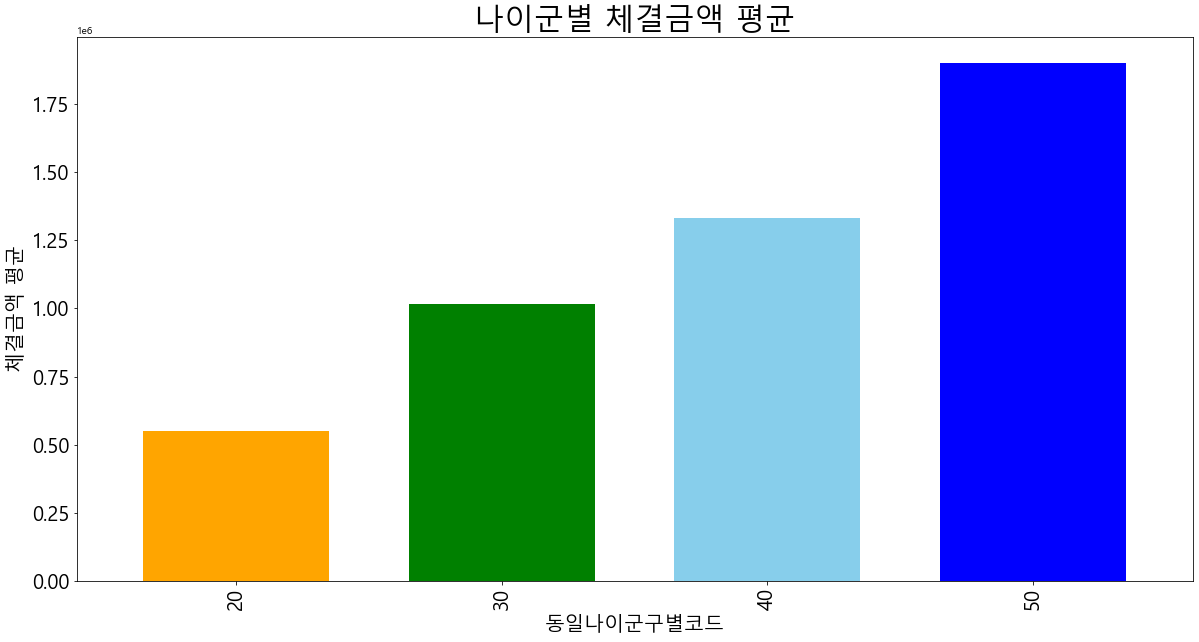

In [29]:
print('------------- 총 체결금액 평균 중 나이군별 비율 ---------------')
print(grouped_mean['총체결금액'] / grouped_mean['총체결금액'].sum())
print('------------------------------------------------------------')

grouped_mean['총체결금액'].plot(kind='bar', figsize=(20,10), width=0.7, fontsize=20,
                              color=['orange', 'green', 'skyblue', 'blue'])
plt.title('나이군별 체결금액 평균', size=30)
plt.ylabel('체결금액 평균', size=20)
plt.xlabel('동일나이군구별코드', size=20)
plt.show()

------------- 전체 체결금액 중 나이군별 비율 ---------------
동일나이군구분코드
20   0.11994
30   0.36355
40   0.30264
50   0.21387
Name: 총체결금액, dtype: float64
---------------------------------------------------------


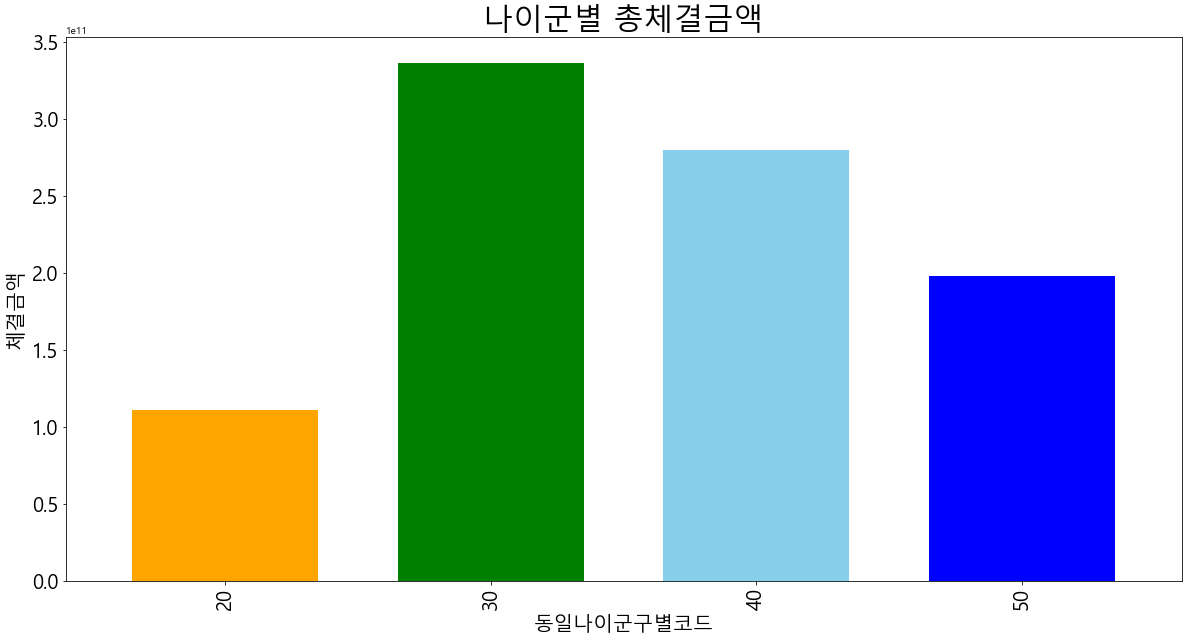

In [31]:
print('------------- 전체 체결금액 중 나이군별 비율 ---------------')
print(grouped_sum['총체결금액'] / grouped_sum['총체결금액'].sum())
print('---------------------------------------------------------')

grouped_sum['총체결금액'].plot(kind='bar', figsize=(20,10), width=0.7, fontsize=20,
                              color=['orange', 'green', 'skyblue', 'blue'])
plt.title('나이군별 총체결금액', size=30)
plt.ylabel('체결금액', size=20)
plt.xlabel('동일나이군구별코드', size=20)
plt.show()

## ■ 기초 통계량 분석 결과:
- 1. 전체 거래수는 30대 > 40대 = 20대 > 50대 순으로 많다.
- 2. 하지만, 체결금액 평균은 50대 > 40대 > 30대 > 20대 순으로 많다.
- 3. 최종적으로 총체결금액은 30대 > 40대 > 50대 > 20대 순으로 많다.
- 4. MZ 세대(20, 30대) 는 상대적으로 거래수는 많지만, 실제 체결금액은 적고, 다른세대는 거래수는 적지만, 건당 체결금액은 크다.

---
### 가설 1(동학개미운동의 주역은 MZ 세대일까?) 의 검증:
### 동학개미운동 기간 동안 신규 투자는 30대에서 주로 이루어졌다. 30대는 거래수와 총체결금액이 모든 세대중에서 가장 많았다. 20대는 투자금액은 적었지만 40대와 거래수가 비슷하여, 20대가 40대에 비해 상대적으로 고정수입이 적음에도 주식 투자 활동은 활발히 하는 것을 알 수 있었다.
### 따라서, MZ 세대가 다른 세대보다 동학개미운동에 더 영향을 미친 것을 알 수 있었다.
---

## 가설 2. MZ 세대의 주식투자 특징은 무엇일까?
### 1. 머신러닝 분류 모델을 이용하여 MZ 세대와 다른 세대의 구별되는 특징을 도출해본다.
### 2. KRX 데이터를 활용하여 MZ 세대와 다른 세대의 구별되는 특징을 도출해본다.

## ■ 머신러닝 분류 모델을 활용하여 다른 세대와 구별되는 MZ 세대의 특징 도출

### ▩ 데이터 전처리

### 데이터 타입이 Object 인 '동일나이군구분코드' 컬럼을 MZ 세대(20대, 30대)를 1, 다른 세대를 0 으로 Int 타입으로 변경한다. 